<h2> AUTHORS: Albin Larsson & Alex Wolf

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction import DictVectorizer

<H2>Task 1: Working with a dataset with categorical features

<h3>Step 1. Reading the data

In [2]:
train_data = pd.read_csv('adult_train.csv')
test_data = pd.read_csv('adult_test.csv')

# Split the data into input (X) and output (Y)
X_train = train_data.drop('target', axis=1)  # Assuming 'target' is the column you want to predict
Y_train = train_data['target']
X_test = test_data.drop('target', axis=1)
Y_test = test_data['target']

<h3>Step 2: Encoding the features as numbers.

In [3]:
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States


<H2> Encoding

In [4]:
dicts_for_my_training_data = X_train.to_dict('records')
dicts_for_my_test_data = X_test.to_dict('records')

In [5]:
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)
X_test_encoded = dv.transform(dicts_for_my_test_data)

<H2> Trying with random forest if it works

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
randomforest = RandomForestClassifier(random_state=0)
np.average(cross_val_score(randomforest, X_train_encoded, Y_train))

0.8467491260155932

<H3>Step 3. Combining the steps.

In [9]:
from sklearn.pipeline import make_pipeline
# Create a pipeline with DictVectorizer and RandomForestClassifier
randomforest_pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(random_state=0)
)

In [11]:
# Define a range of max_depth values to try
max_depths = range(1, 10)

for depth_value in max_depths:
    # Set the max_depth parameter in the RandomForestClassifier
    randomforest_pipeline.set_params(randomforestclassifier__max_depth=depth_value)
    
    # Cross-validation accuracy on the training set
    cross_val_accuracy = cross_val_score(randomforest_pipeline, dicts_for_my_training_data, Y_train, cv=5).mean()
    print(f"Cross-validation accuracy with max_depth={depth_value}: {cross_val_accuracy:.4f}")

Cross-validation accuracy with max_depth=1: 0.7592
Cross-validation accuracy with max_depth=2: 0.7683
Cross-validation accuracy with max_depth=3: 0.7924
Cross-validation accuracy with max_depth=4: 0.8262
Cross-validation accuracy with max_depth=5: 0.8369
Cross-validation accuracy with max_depth=6: 0.8435
Cross-validation accuracy with max_depth=7: 0.8483
Cross-validation accuracy with max_depth=8: 0.8513
Cross-validation accuracy with max_depth=9: 0.8542


<H2>Task 2: Decision trees and random forests

<h2>Underfitting and overfitting in decision tree classifiers.

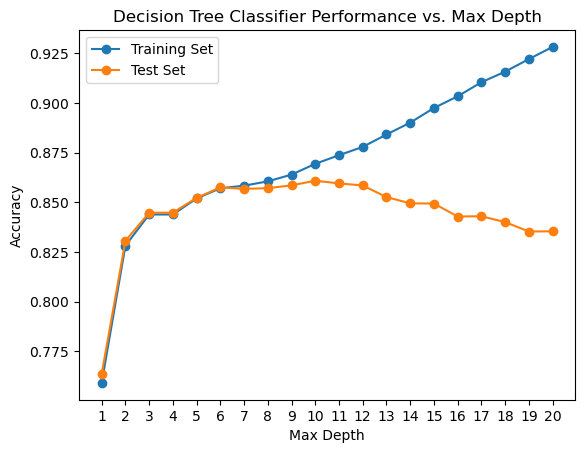

In [18]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize lists to store results
depth_values = range(1, 21)  # Set the range of max_depth values to try
train_accuracy_scores = []
test_accuracy_scores = []

decisiontree_pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(random_state=0)
)

# Loop through different max_depth values
for max_depth in depth_values:
    # Set the max_depth parameter in the DecisionTreeClassifier within the pipeline
    decisiontree_pipeline.set_params(decisiontreeclassifier__max_depth=max_depth)
    
    # Fit the model on the training set
    decisiontree_pipeline.fit(dicts_for_my_training_data, Y_train)
    
    # Predictions on the training set
    Y_train_pred = decisiontree_pipeline.predict(dicts_for_my_training_data)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    
    # Predictions on the test set
    Y_test_pred = decisiontree_pipeline.predict(dicts_for_my_test_data)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    
    # Store the accuracy scores
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the results
plt.plot(depth_values, train_accuracy_scores, label='Training Set', marker='o')
plt.plot(depth_values, test_accuracy_scores, label='Test Set', marker='o')
plt.title('Decision Tree Classifier Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_values) 
plt.legend()
plt.show()

<H3>As we did in Assignment 1 we have accuracy as a function of max depth. The plot is similar to our Task 4 and Step 4. After about 6 as max depth the Train set and Test set accuracy start to deviate. The accuracy of the training set increases since the decision tree "remembers" all of the data, i.e it creates a leaf for each training Y. This is a case of overfitting since it will more often predict the wrong output in the test set.

<H2>Underfitting and overfitting in random forest classifiers.

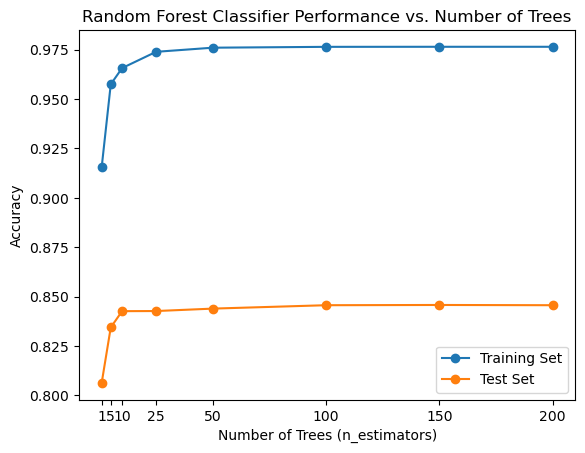

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize lists to store results
n_estimators_values = [1, 5, 10, 25, 50, 100, 150, 200]  # Set the range of n_estimators values to try
train_accuracy_scores = []
test_accuracy_scores = []

randomforest_pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(random_state=0)
)

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Set the n_estimators parameter in the RandomForestClassifier within the pipeline
    randomforest_pipeline.set_params(randomforestclassifier__n_estimators=n_estimators)
    
    # Fit the model on the training set
    randomforest_pipeline.fit(dicts_for_my_training_data, Y_train)
    
    # Predictions on the training set
    Y_train_pred = randomforest_pipeline.predict(dicts_for_my_training_data)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    
    # Predictions on the test set
    Y_test_pred = randomforest_pipeline.predict(dicts_for_my_test_data)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    
    # Store the accuracy scores
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the results
plt.plot(n_estimators_values, train_accuracy_scores, label='Training Set', marker='o')
plt.plot(n_estimators_values, test_accuracy_scores, label='Test Set', marker='o')
plt.title('Random Forest Classifier Performance vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_values) 
plt.legend()
plt.show()

What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

What happens with the curve for random forests as the ensemble size grows?
    
What happens with the best observed test set accuracy as the ensemble size grows?
    
What happens with the training time as the ensemble size grows? 

<H2>Task 3: Feature importances in random forest classifiers